<img src="ratatouille.jpg" >

In [20]:
import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

## Import Data 

In [2]:
data = pd.read_json("train.json")
test = pd.read_json("test.json")
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


### Removing NULL/NAN values

In [3]:
data.isnull().values.any()
data.dropna(axis=0, how='any',inplace = True)
data.isnull().values.any()
data.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [4]:
data.shape

(39774, 3)

### List of cuisines

In [5]:
data.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish',
       'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese',
       'cajun_creole', 'brazilian', 'french', 'japanese', 'irish',
       'korean', 'moroccan', 'russian'], dtype=object)

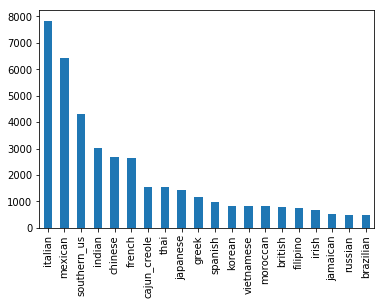

In [6]:
pd.value_counts(data['cuisine']).plot.bar()

### Input to the model

In [7]:
#Convert into proper format
data.ingredients =data.ingredients.str.join(' ')
test.ingredients =test.ingredients.str.join(' ')

In [8]:
# convert text to unique integers with HashingVectorizer
vect = HashingVectorizer()
features = vect.fit_transform(data.ingredients)
testfeatures = vect.transform(test.ingredients)

In [9]:
labels = data.cuisine

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression

start = time.time()

log_reg = LogisticRegression(C=12)
log_reg.fit(X_train,y_train)

print("Time: " , time.time() - start )
print("Accuracy: ",log_reg.score(X_test, y_test))

Time:  43.60609221458435
Accuracy:  0.789063482087


In [14]:
from sklearn.svm import LinearSVC

start = time.time()

linear_svm = LinearSVC(random_state=0, max_iter = 1500)
linear_svm.fit(X_train, y_train)

print("Time: " , time.time() - start )
print("Accuracy: ",linear_svm.score(X_test, y_test))

Time:  3.2295329570770264
Accuracy:  0.788434946574


In [18]:
from sklearn.svm import SVC

start = time.time()

rbf_svm = SVC(kernel='rbf', gamma=0.8, C=12)
rbf_svm.fit(X_train, y_train)


print("Time: " , time.time() - start )
print("Accuracy: ",rbf_svm.score(X_test, y_test))

Time:  167.85421752929688
Accuracy:  0.796857322439


In [16]:
prediction = rbf_svm.predict(testfeatures)
sub = pd.DataFrame({'id':test.id,'cuisine':prediction})
output = sub[['id','cuisine']]
output.to_csv("sample_submission.csv",index = False)